# Stats Codebook - Descriptive Statistics

---

## Contents

- [Quantiles](#quantiles)
- [Absolute & Relative Frequencies](#frequencies)
- [Empirical Cumulative Distribution Function](#ecdf)


- [Measures of Center](#measures-center)
  - [Arithmetic Mean](#arithmetic-mean)
  - [Weighted Mean](#weighted-mean)
  - [Harmonic Mean](#harmonic-mean)
  - [Geometric Mean](#geometric-mean)
  - [Median](#median)
  - [Mode](#mode)


- [Measures of Spread](#measures-spread)
  - [Range](#range)
  - [Interquartile Range](#iqr)
  - [Deviations](#deviations)
  - [Variance](#variance)
  - [Standard Deviation](#stdev)
  - [Coefficient of Variation](#coefficient-variation)


- [Measures of Shape](#measures-shape)
  - [Skewness](#skewness)
  - [Kurtosis](#kurtosis)


- [Measures of Concentration](#measures-concentration)
  - [Lorenz Curve](#lorenz-curve)
  - [Gini Coefficient](#gini)


- [Measures of Correlation](#measures-correlation)
  - [Covariance](#covariance)
  - [Pearson's Correlation Coefficient](#pearson-correlation)
  - [Spearman's Correlation Coefficient](#spearman-correlation)
  - [Pearson's $\chi^2$ Statistic](#pearson-chisq-statistic)
  
  
- [Permutations](#permutations)
- [Combinations](#combinations)

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats

from statsmodels.distributions.empirical_distribution import ECDF

from scipy.special import binom
from itertools import permutations, combinations
from itertools import product, combinations_with_replacement

plt.style.use("fivethirtyeight")
%matplotlib inline

---

## Datasets

In [2]:
tips = sns.load_dataset("tips")

---

<a id="quantiles"></a>
## Quantiles

Data una distribuzione ordinata, un **quantile** è un valore in grado di separare i suoi elementi in gruppi di una certa numerosità.

Ad esempio, il **50% quantile** è quel valore che divide la distribuzione in due gruppi adiacenti di uguale cardinalità. Il **30% quantile**, invece, è quel valore che è maggiore o uguale del 30% degli altri elementi e strettamente inferiore rispetto al restante 70%.

Non è detto che un quantile sia contenuto nella distribuzione per la quale è calcolato: dipende dall'interpolazione scelta.

I **quartili**, invece, sono i *tre* quantili che ripartiscono la popolazione in *quattro* parti di uguale numerositàIl **25%** dei valori della distribuzione sono inferiori/uguali al primo quartile; il **50%** dei valori della distribuzione sono inferiori/uguali al secondo quartile; il **75%** dei valori della distribuzione sono inferiori/uguali al terzo quartile.

<br>

Possiamo usare i quantili come strumento per confrontare due distribuzioni distinte e verificare se presentano un andamento simile. Per farlo, costruiamo il cosiddetto **Quantile-Quantile Plot** (*QQ-Plot*).

Si confrontano i quantili omologhi delle due distribuzioni d'interesse, ricercando un andamento del grafico il più rettilineo possibile, così da poter confermare l'andamento equivalente.

L'interpretazione degli *scatter* non rettilinei sono intuitivi sulla base della composizione del grafico: un incrocio di quantili *superiore* rispetto alla retta centrale indica una tendenza della variabile in ordinate ad assumere valori superiori per i corrispondenti quartili, e viceversa per incroci *inferiori* rispetto alla retta centrale.

_Con Numpy/Pandas va usata un'interpolazione come *lower*, *higher* o *nearest* per farsi restituire sempre un valore della distribuzione. Si possono utilizzare le interpolazioni *linear* o *midpoint* per ottenere dei risultati più precisi, ma non è garantito che questi siano contenuti nell'insieme in oggetto._

_Calcolo del **50% quantile** con interpolazione **nearest**._

In [3]:
np.quantile(a = tips.tip, q = 0.5, interpolation = "nearest")

2.92

_Calcolo del **50% quantile** con interpolazione **linear**._

In [4]:
np.quantile(a = tips.tip, q = 0.5, interpolation = "linear")

2.9

_Calcolo dei **quartili**._

In [5]:
np.quantile(a = tips.tip,
            q = [0.25, 0.50, 0.75],
            interpolation = "nearest")

array([2.  , 2.92, 3.55])

_Calcolo dei **percentili**._

In [6]:
np.quantile(
    a = tips.tip,
    q = np.linspace(0.01, 1, 100),
    interpolation = "nearest")

array([ 1.  ,  1.1 ,  1.25,  1.32,  1.44,  1.47,  1.5 ,  1.5 ,  1.5 ,
        1.5 ,  1.57,  1.61,  1.66,  1.68,  1.73,  1.8 ,  1.92,  1.98,
        2.  ,  2.  ,  2.  ,  2.  ,  2.  ,  2.  ,  2.  ,  2.  ,  2.  ,
        2.  ,  2.  ,  2.  ,  2.  ,  2.01,  2.02,  2.05,  2.18,  2.2 ,
        2.24,  2.3 ,  2.34,  2.47,  2.5 ,  2.5 ,  2.5 ,  2.5 ,  2.54,
        2.6 ,  2.64,  2.74,  2.75,  2.92,  3.  ,  3.  ,  3.  ,  3.  ,
        3.  ,  3.  ,  3.  ,  3.  ,  3.  ,  3.02,  3.07,  3.11,  3.14,
        3.18,  3.21,  3.23,  3.27,  3.35,  3.41,  3.48,  3.5 ,  3.5 ,
        3.5 ,  3.5 ,  3.55,  3.68,  3.75,  3.92,  4.  ,  4.  ,  4.  ,
        4.  ,  4.  ,  4.08,  4.2 ,  4.3 ,  4.34,  4.71,  5.  ,  5.  ,
        5.  ,  5.  ,  5.07,  5.15,  5.2 ,  5.65,  6.  ,  6.5 ,  7.58,
       10.  ])

_Funzione custom per la costruzione di un **Quantile-Quantile Plot**._

In [7]:
def qq_plot(x, y, xlabel = "X", ylabel = "Y"):
    fig, ax = plt.subplots(figsize = (6, 4))
    quantiles = np.linspace(0, 1, min(len(x), len(y)))
    x_quantiles = np.quantile(x, quantiles, interpolation = "nearest")
    y_quantiles = np.quantile(y, quantiles, interpolation = "nearest")
    ax.plot([0,1],[0,1], color="k", alpha=0.7, transform=ax.transAxes,
           linestyle = "--", linewidth = 1.5)
    ax.scatter(x_quantiles, y_quantiles,
               color = "cornflowerblue", s = 100, edgecolor = "k",
               linewidth = 1.5, alpha = 0.5)
    plt.xlabel(f"{xlabel} Quantiles")
    plt.ylabel(f"{ylabel} Quantiles")
    plt.show()

_Confronto di due variabili per verificare se presentano **andamenti comparabili**._

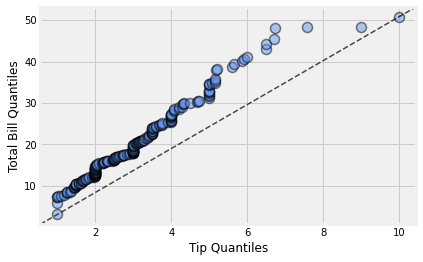

In [8]:
qq_plot(x = tips.tip, y = tips.total_bill,
        xlabel = "Tip", ylabel = "Total Bill")

_Creazione di un sample normale con media e deviazione standard coincidenti con la *feature* da analizzare._

In [9]:
normal_distro = stats.norm.rvs(loc = tips.tip.mean(),
                               scale = tips.tip.std(),
                               size = len(tips.tip))

_QQ-Plot per verificare se la feature d'interesse ha andamento normale._

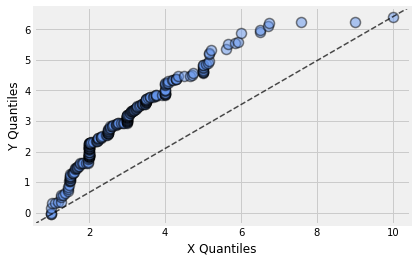

In [10]:
qq_plot(tips.tip, normal_distro)

---

<a id="frequencies"></a>
## Absolute & Relative Frequencies

Data una variabile categorica, il numero di osservazioni che ricadono in una delle sue categorie è detta **absolute frequency**.

La **relative frequency** di una categoria, invece, è il rapporto fra il numero di osservazioni associate ad essa e il numero totale di osservazioni contenute in tutte le categorie.

La somma delle frequenze relative di tutte le categorie è sempre pari ad uno.

$$\large f_i=\frac{n_i}{n}\;\;\;\;\;i=1,\dots,k$$

$$\large \sum_{i=1}^{k}f_i=1$$

Una **frequency distribution** è una struttura dati che associa a ciascuna classe di una variabile categorica o a ciascun intervallo di una variabile continua le corrispondenti frequenze assolute e relative.

_**Absolute frequency distribution** di una variabile categorica_

In [11]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

_**Relative frequency distribution** di una variabile categorica_

In [12]:
tips.day.value_counts() / len(tips)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

_**Absolute Frequency Distribution** di una variabile continua_

In [13]:
df = tips.copy()
df["tip_bin"] = pd.cut(x = df.tip,
                       bins = np.arange(0, 12, 2),
                       right = True)

In [14]:
df.tip_bin.value_counts()

(2, 4]     125
(0, 2]      78
(4, 6]      34
(6, 8]       5
(8, 10]      2
Name: tip_bin, dtype: int64

_**Relative Frequency Distribution** di una variabile continua_

In [15]:
df.tip_bin.value_counts() / len(tips)

(2, 4]     0.512295
(0, 2]     0.319672
(4, 6]     0.139344
(6, 8]     0.020492
(8, 10]    0.008197
Name: tip_bin, dtype: float64

_Funzione custom per la costruzione di una **Frequency Distribution** generalizzata. Nel caso di variabili continue, si richiede un numero di split per creare delle pseudo-categorie_

In [16]:
def freq_dist(df, variable, splits = 4):
    if df[variable].dtype in ["float", "int"]:
        bins = np.linspace(np.min(df[variable]),
                           np.max(df[variable]),
                           splits + 1)
        data = pd.cut(x = df[variable], bins = bins, right = True)
    else:
        data = df[variable].copy()
    distro = pd.DataFrame({"Abs Freq": data.value_counts()})
    distro["Rel Freq"] = data.value_counts() / len(data)
    return pd.concat({data.name: distro})    

In [17]:
freq_dist(df = tips, variable = "day")

Abs Freq  Rel Freq
day Sat         87  0.356557
    Sun         76  0.311475
    Thur        62  0.254098
    Fri         19  0.077869

In [18]:
freq_dist(df = tips, variable = "tip", splits = 6)

Abs Freq  Rel Freq
tip (1.0, 2.5]        104  0.426230
    (2.5, 4.0]         95  0.389344
    (4.0, 5.5]         29  0.118852
    (5.5, 7.0]          9  0.036885
    (8.5, 10.0]         2  0.008197
    (7.0, 8.5]          1  0.004098

---

<a id="ecdf"></a>
## Empirical Cumulative Distribution Function

Data una variabile ordinabile, l'*ECDF* è una funzione che, dato un certo valore $x$, restituisce la somma delle frequenze relative di tutti i valori assunti dalla variabile che sono uguali o inferiori ad $x$.

$$\large F(x)=\sum_{a_i\leq x}f(a_i)$$

_Funzione custom per plottare l'ECDF_

In [19]:
def empirical_cdf(data):
    ecdf = ECDF(x = data)
    fig, ax = plt.subplots(figsize = (8, 6))
    ax.plot(ecdf.x, ecdf.y)
    ax.fill_between(ecdf.x, ecdf.y, alpha = 0.4)
    plt.xticks(np.arange(np.min(data), np.max(data)+1))
    plt.show()
    return ecdf

_ECDF di una variabile **categorica**_

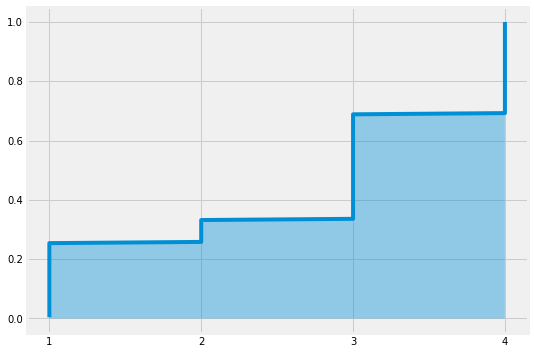

In [20]:
tips["day_num"] = tips.day.replace({"Thur": 1, "Fri": 2, "Sat": 3, "Sun": 4})

ecdf = empirical_cdf(data = tips.day_num)

_Calcolo della **Cumulative Frequency** di alcuni valori d'interesse_

In [21]:
ecdf(5), ecdf(3), ecdf(-1)

(1.0, 0.6885245901639344, 0.0)

_ECDF di una variabile **continua**_

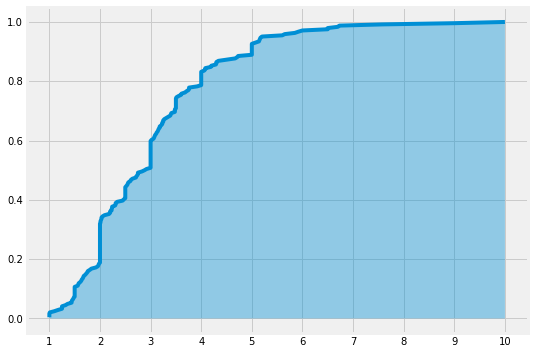

In [22]:
ecdf = empirical_cdf(data = df.tip)

_Calcolo della **Cumulative Frequency** di alcuni valori d'interesse_

In [23]:
ecdf(12), ecdf(4), ecdf(-1)

(1.0, 0.8319672131147541, 0.0)

---

<a id="measures-center"></a>
## Measures of Center

---

<a id="arithmetic-mean"></a>

L'**Arithmetic Mean** è la somma dei valori delle osservazioni diviso per il numero totale di osservazioni. Non è una *robust statistic*.

$$\large \bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_i$$

In [24]:
np.mean(tips.tip)

2.9982786885245902

---

<a id="weighted-mean"></a>

Nella **Weighted Mean** ogni osservazione è moltiplicata per il proprio *weight* e si divide per la somma di tutti i *weights*. E' la generalizzazione dell'*arithmetic mean* con pesi tutti unitari.

$$\large \bar{x}=\frac{\sum_{i=1}^{n}x_i\cdot w_i}
{\sum_{i=1}^{n}w_i}$$

In [25]:
np.average(a = [10, 20, 30], weights = [0.6, 0.3, 0.1])

15.000000000000002

---

<a id="harmonic-mean"></a>

L'**Harmonic Mean** si usa quando le osservazioni sono dei *rates*, cioè sono definite nativamente come dei rapporti (es. velocità).

$$\large \bar{x}=\frac{n}{\sum_{i=1}^{n}\frac{1}{x_i}}$$

Esiste anche la **Weighted Harmonic Mean**:

$$\large \bar{x}=\frac{w_i}{\sum_{i=1}^{n}\frac{w_i}{x_i}}$$

In [26]:
statistics.harmonic_mean([30.0, 70.0, 100.0])

52.06611570247934

---

<a id="geometric-mean"></a>

La **Geometric Mean** si utilizza per calcolare la media di una variabile in cui i singoli valori dipendono dai valori precedenti, cioè non sono indipendenti. Si calcola come la radice $n$-esima del prodotto di tutte le $n$ osservazioni.

$$\large \bar{x}=\left[ x_1\times\dots\times x_n \right]^{\frac{1}{n}}$$

**Esempio**: Calcolare il *growth rate* annuale medio dati i seguenti *growth rate* annuali: 5%, 10%, 20%, -50%, 20%.

In [27]:
data = [0.05, 0.1, 0.2, -0.5, 0.2]

# Si aggiunge 1 a tutti gli elementi
# Per poter lavorare anche con i negativi
data = [1 + gr for gr in data]

# Si sottrae 1 alla fine
# Per avere la reale media geometrica
stats.mstats.gmean(data) - 1

-0.03620893421472193

Il *growth rate* annuale medio è del -3.6%.

---

<a id="median"></a>

La **Median** è l'osservazione che divide una distribuzione ordinabile in due parti di uguale numerosità.

In caso di cardinalità *pari* della distribuzione, non esiste un vero valore centrale, pertanto la *median* va calcolata come la media aritmetica delle due osservazioni centrali.

A livello numerico, la *median* coincide con il secondo quartile o il 50° percentile.

E' una *robust statistics*.

In [28]:
np.median(tips.tip)

2.9

---

<a id="mode"></a>

La **Mode** è il valore della distribuzione a cui è associata la maggiore frequenza assoluta. In altre parole, è l'osservazione che si ripete più spesso nell'insieme totale dei valori.

In [29]:
statistics.mode(tips.tip)

2.0

---

<a id="measures-spread"></a>
## Measures of Spread

<a id="range"></a>

Il **Range** è definito come la differenza fra il valore massimo ed il valore minimo della distribuzione. Non è una *robust statistics*.

In [30]:
np.max(tips.tip) - np.min(tips.tip)

9.0

---

<a id="iqr"></a>

L'**Interquartile Range** è definito come la differenza fra il terzo ed il primo quartile della distribuzione, e coincide quindi con l'ampiezza della fascia di valori che contiene la metà *centrale* (il 50%) dei valori della distribuzione. E' una *robust statistics*.

In [31]:
stats.iqr(x = tips.tip, interpolation = "nearest")

1.5499999999999998

_Verifica del risultato precedente con il calcolo del primo e terzo quartile._

In [32]:
first_quartile = np.quantile(a = tips.tip, q = 0.75, interpolation = "nearest")
third_quartile = np.quantile(a = tips.tip, q = 0.25, interpolation = "nearest")

np.abs(third_quartile - first_quartile)

1.5499999999999998

---

<a id="deviations"></a>

L'**Absolute Deviation** è la media delle deviazioni di tutti gli elementi della distribuzione rispetto ad un certo valore $A$.

$$\large D(A)=\frac{1}{n}\sum_{i=1}^{n}|x_i-A|$$

In [33]:
A = 7.3

np.mean(np.abs(tips.tip - A))

4.340081967213107

L'*absolute deviation* assume valore minimo quando $A$ coincide con la *median* della distribuzione. Si parla quindi di **absolute median deviation**.

Tale misura di dispersione è preferibile alla deviazione standard quando nella distribuzione sono presenti molti *outlier*, in quanto la media aritmetica non è robusta quanto la mediana.

$$\large D(x_{0.5})=\frac{1}{n}\sum_{i=1}^{n}|x_i-x_{0.5}|$$

In [34]:
np.mean(np.abs(tips.tip - np.median(tips.tip)))

1.032377049180328

Quando invece il valore di riferimento per l'*absolute deviation* è la *mean*, si parla di **absolute mean deviation**.

$$\large D(\bar{x})=\frac{1}{n}\sum_{i=1}^{n}|x_i-\bar{x}|$$

In [35]:
np.mean(np.abs(tips.tip - np.mean(tips.tip)))

1.0330186777747912

---

<a id="variance"></a>

La **Variance** è definita come la media di tutte le *deviation* quadrate rispetto alla media della distribuzione.

L'unità di misura della varianza è il quadrato dell'unità di misura della distribuzione. Non è una *robust statistic*.

$$\large \sigma^2=\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2$$

_Population Variance con zero gradi di libertà_

In [36]:
np.var(a = tips.tip, ddof = 0)

1.9066085124966428

_Sample Variance con un grado di libertà_

In [37]:
np.var(a = tips.tip, ddof = 1)

1.9144546380624725

Data una distribuzione i cui dati sono suddivisi in $k$ categorie, il **Theorem of Variance Decomposition** ci permette di decomporre la varianza totale della distribuzione in *variance between classes* e *variance within classes*.

$$\large \sigma^2=\frac{1}{n}\sum_{i=1}^{k}n_i(\bar{x}_i-\bar{x})^2+
\frac{1}{n}\sum_{i=1}^{k}n_i\;\sigma^2_i$$

Il primo termine è la **variance between classes** ed è definita come la somma di tutte le variazioni quadratiche degli elementi di ciascun gruppo rispetto alla media totale della distribuzione, moltiplicate per la cardinalità del gruppo corrispondente. Il risultato della sommatoria è poi diviso per la cardinalità totale della distribuzione.

Il secondo termine è la **variance within classes** ed è definita come la sommatoria delle singole varianze intra-gruppo moltiplicate per la cardinalità del gruppo stesso. Il risultato della sommatoria è poi diviso per la cardinalità totale della distribuzione.

La formula delle varianze intra-gruppo emula quella della varianza generale:

$$\large \sigma_i^2=\frac{1}{n_i}\sum_{x_i\in K_i}(x_i-\bar{x}_i)^2$$

_Funzione custom che implementa la **variance decomposition** in between classes e within classes_

In [38]:
def variance_decomposition(df, data_variable, categorical_variable):
    between = 0
    within = 0
    for categ in df[categorical_variable].unique():
        sub_df = df[df[categorical_variable] == categ]
        mean_diff = sub_df[data_variable].mean() - df[data_variable].mean()
        between += np.power(mean_diff, 2) * len(sub_df)
        within += sub_df[data_variable].var(ddof=0) * len(sub_df)
    between = between / len(df)
    within = within / len(df)
    return between, within

In [39]:
between, within = variance_decomposition(df = tips.copy(),
                                         data_variable = "tip",
                                         categorical_variable = "day")
between, within

(0.039040464167848676, 1.8675680483287926)

_Verifica del risultato_

In [40]:
np.var(a = tips.tip, ddof=0), between + within

(1.9066085124966428, 1.9066085124966414)

<a id="stdev"></a>

La **Standard Deviation** è definita come la radice quadrata della varianza, pertanto rappresenta una misura di quanto le osservazioni siano distribuite lontano dalla media.

Un basso valore di deviazione standard indica che i valori della distribuzione sono altamente concentrati attorno alla media aritmetica; al contrario, un valore alto di deviazione standard indica la presenza di un gran numero di valori lontani dalla media.

Si tratta dell'indice di riferimento per rappresentare il grado di dispersione dei dati di una distribuzione. In presenza di molti *outlier*, gli si può preferire l'*absolute median deviation* per sopperire alla poca robustezza della media aritmetica.

Al contrario della *variance*, l'unità di misura della *standard deviation* coincide con l'unità di misura degli elementi della distribuzione. Non è una *robust statistic*.

$$\large \sigma=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

_Population Standard Deviation con zero gradi di liberà_

In [41]:
tips.tip.std(ddof = 0)

1.3807999538298958

_Sample Standard Deviation con un grado di libertà_

In [42]:
tips.tip.std(ddof = 1)

1.3836381890011826

<a id="coefficient-variation"></a>

Il **Coefficient of Variation** è un indice di variabilità che descrive il rapporto fra la deviazione standard e la media della distribuzione in analisi. E' utile per comparare distribuzioni con medie molto diverse tra loro: in casi del genere, infatti, non ha senso confrontare le deviazioni standard direttamente, poiché esse sono influenzate dall'entità del corrispondente valore centrale.

Essendo espresso in forma percentuale, è una statistica *unitless*. Se il risultato dell'operazione, ad esempio, è 15%, possiamo affermare che la il valore della deviazione standard è il 15% della media.

Se il sample $A$ presenta $CV=12\%$ e il sample $B$ presenta $CV=25\%$, possiamo affermare che $B$ presenta una maggiore variabilità attorno alla propria media se paragonato con $A$.

$$\large \left( \frac{\sigma}{\mu} \right)\times 100 (\%)$$

In [43]:
stats.variation(a = tips.tip), stats.variation(a = tips.total_bill)

(0.4605308903120568, 0.4490132589117038)

---

<a id="measures-shape"></a>
## Measures of Shape

<a id="skewness"></a>

La **skewness**, anche detta **simmetry**, è una misura di asimmetria della distribuzione di frequenza dei valori di una variabile. Una distribuzione può essere **left skewed** (la *coda* è verso sinistra), **right-skewed** (la *coda* è verso destra) o **symmetric** (nessuna coda apparente). Nelle distribuzioni *left-skewed*, la *mean* è sempre più piccola della *median*; al contrario, nelle *right-skewed* la *mean* è sempre più grande della *median*. Per ricordarlo, basta immaginare che la *mean* sia come *tirata* nella direzione della coda della distribuzione. In una distribuzione simmetrica, invece, *mean* e *median* sono quasi coincidenti.

Si calcola con il **Pearson's coefficient of skewness**, definito usando la *sample mean*, la *sample standard deviation* e la *sample median*.

$$\large sk=\frac{3(\bar{x}-x_{0.5})}{s}$$

_Usando skew di scipy abbiamo output nullo per le distribuzioni simmetriche, output positivi per le right-skewed e negativo per le left-skewed_

In [44]:
stats.skew(a = tips.tip)

1.4564266884221506

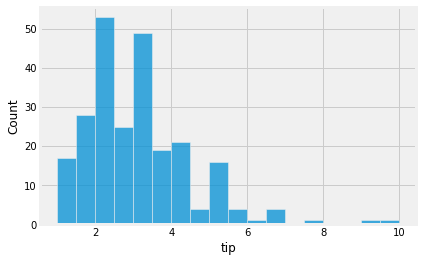

In [45]:
sns.histplot(tips.tip)
plt.show()

---

<a id="kurtosis"></a>

L'indice di **Kurtosis** può essere utilizzato come misura del grado di somiglianza della distribuzione in oggetto con la distribuzione normale. Più in generale, la *curtosi* fornisce informazioni riguardo l'*altezza* di una distribuzione rispetto al valore della sua deviazione standard.

Le distribuzioni possono essere classificate in tre categorie di curtosi: **mesokurtic** (rapporto moderato fra picco e deviazione standard, come ad esempio nella distribuzione normale), **leptokurtic** (particolarmente alte e strette attorno alla media) e **platykurtic** (più larghe e appiattite).

L'indice di curtosi si calcola a partire dal momento centrale di ordine 4 e il quadrato della *sample variance*:

$$\large kurt = \frac{\sum(x-\bar{x})^4}{s^4}-3$$

Se il coefficiente di curtosi è maggiore di zero, la distribuzione è *leptokurtic*; se è negativo, la distribuzione è *platykurtic*; se è nullo, la distribuzione è *mesokurtic*.

_Usando kurtosis di scipy abbiamo output nullo per distribuzioni esattamente normali, in particolare se settiamo fisher = True_

In [46]:
stats.kurtosis(a = tips.total_bill, fisher = True)

1.1691681323851366

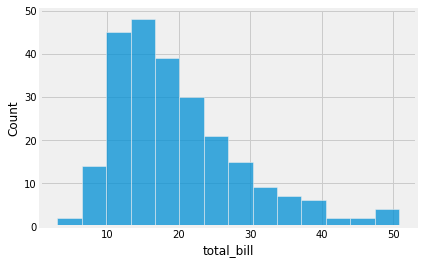

In [47]:
sns.histplot(tips.total_bill)
plt.show()

---

<a id="measures-concentration"></a>
## Measures of Concentration

<a id="lorenz-curve"></a>

A differenza delle statistiche di centralità e di dispersione, gli indici di *concentrazione* descrivono la proporzione assunta da ciascun'osservazione rispetto alla somma di tutte le osservazioni analizzate. Uno dei metodi più famosi per trattare analiticamente la *concentration* è la **Lorenz Curve**.

Consideriamo una distribuzione ordinata $x_1,\dots,x_n$, e supponiamo che tutte le osservazioni siano positive (si tratta di un'assunzione forte, ma gli indici di concentrazione hanno senso per variabili quantitative che riflettono delle *count* concrete del mondo reale, che difficilmente sono negative).

Per plottare la curva di Lorenz abbiamo bisogno di costruire i due assi. Sulle ascisse posizioniamo $u_i$, definito come la suddivisione dell'intervallo proporzionale $[0, 1]$ in tanti punti quanti sono gli elementi della distribuzione.

$$\large u_i=\frac{i}{n}\;\;\;\;\;i=1,\dots,n\;\;\;\;\;u_0=0$$

Sulle ordinate inseriamo $v_i$, definito come la somma cumulativa dei valori della distribuzione fino al corrispondente elemento i-esimo, divisa per la somma di tutti gli elementi della distribuzione.

$$\large v_i=\frac{\sum_{i=1}^{i}x_i}{\sum_{i=1}^{n}x_i}
\;\;\;\;\;i=1,\dots,n\;\;\;\;\;v_0=0$$

Plottare $u_i$ e $v_i$ ci mostra quando la somma cumulativa delle osservazioni fino all'i-esima contribuisca alla somma totale. Se tutte le osservazioni sono identiche, la curva di Lorenz sarà una retta diagonale a 45°, detta *line of equality*.

Il generico punto della curva di Lorenz $(u_i,v_i)$ indica che il primo (secondo l'ordinamento) $u_i\%$ delle osservazioni contiene il $v_i\%$ del totale d'interesse.

_Funzione custom per plottare la curva di Lorenz_

In [48]:
def plot_lorenz_curve(x):
    x.sort()
    u = np.array([i/len(x) for i in range(0, len(x)+1)])
    v = np.array([np.sum(x[:i]) / np.sum(x) for i in range(0, len(x)+1)])
    
    fig, ax = plt.subplots(figsize = (8, 6))
    ax.plot(u, v, linewidth = 8)
    
    # Line of Equality
    ax.plot([0,1],[0,1], color="k",
            alpha=0.5, transform=ax.transAxes,
            linestyle = "--", linewidth = 1.5)
    ax.fill_between(u, v, alpha = 0.5)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.show()

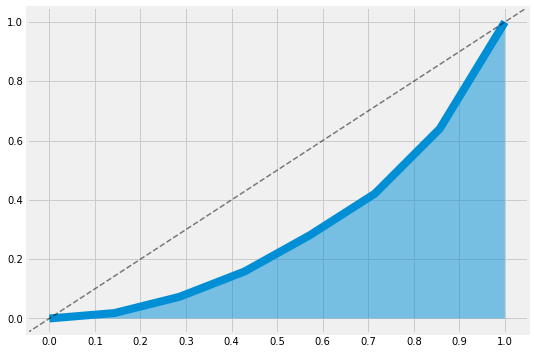

In [49]:
x = np.array([20, 14, 59, 9, 36, 23, 3], dtype = "float")

plot_lorenz_curve(x = x)

---

<a id="gini"></a>

Il **Gini Coefficient** è una misura di concentrazione che assume valore nullo in assenza di concentrazione, cioè in perfetta distribuzione delle quantità fra tutte le osservazioni, e valore unitario per la concentrazione estrema. Può essere calcolato in diverse maniere; qui riportiamo una sua formula semplificata per gli scenari a valori tutti positivi:

$$\large G=\frac{\sum_{i=1}^{n}(2i-n-1)x_i}{n\sum_{i=1}^{n}x_i}$$

In realtà per ottenere un *gini coefficient* compreso fra zero e uno, dobbiamo standardizzare il risultato dell'ultima computazione. Possiamo farlo moltiplicando $G$ per $n/(n-1)$.

_Funzione custom per il calcolo del Gini coefficient_

In [50]:
def gini(x):
    x = x.flatten()
    x.sort()
    
    # No zero values allowed
    x += 0.0000001
    
    idx = np.arange(1, len(x) + 1)
    gini = ((np.sum((2 * idx - len(x)  - 1) * x)) / 
            (len(x) * np.sum(x)))
    return gini * ((len(x))/(len(x)-1))

In [51]:
x = np.array([20, 14, 59, 9, 36, 23, 3], dtype = "float")

gini(x)

0.4695121931179358

In [52]:
x = np.array([23, 24, 22, 24, 22, 25, 23], dtype = "float")

gini(x)

0.028629856727765413

In [53]:
x = np.array([100, 10, 10, 10, 10, 10, 10], dtype = "float")

gini(x)

0.5624999975390625

---

<a id="measures-correlation"></a>
## Measures of Correlation

<a id="covariance"></a>

La **Covariance** è una misura dell'associazione lineare fra due variabili. Un valore positivo indica un'associazione positiva crescente, mentre un valore negativo evidenzia una relazione negativa decrescente. Una covarianza nulla, invece, indica l'assenza di una relazione lineare.

La covarianza fornisce indicazioni solo sulla direzione dell'associazione, non sulla forza della stessa.

$$\large cov(x,y)=s_{xy}=\frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{n-1}$$

$$\large cov(x,y)=\sigma_{xy}=\frac{\sum(x_i-\mu_x)(y_i-\mu_y)}{N}$$

Queste sono le formule per la *sample covariance* e la *population covariance*. A prescindere dalla divisione per il *sample size* meno uno o per la cardinalità della popolazione, il *core* della statistica è il numeratore: si tratta della somma di tutti i prodotti omologhi delle differenze dei valori assunti dalle variabili rispetto ai propri valori medi.

Quando si lavora con più di due variabili, si è soliti produrre una *matrice di covarianza*: si tratta di una two-way table che mostra le covarianze di ogni singola variabile con tutte le altre.

Da notare che la covarianza di una variabile con se stessa coincide con la sua *varianza*, e tale informazione è contenuta nella *covariance matrix* nei valori della diagonale principale.

In [54]:
tips.cov()

,total_bill,tip,size,day_num
total_bill,79.252939,8.323502,5.065983,1.787153
tip,8.323502,1.914455,0.643906,0.216686
size,5.065983,0.643906,0.904591,0.181761
day_num,1.787153,0.216686,0.181761,1.335813


---

<a id="pearson-correlation"></a>

Date due variabili numeriche, misurarne la **correlation** ci permette di rappresentare quantitativamente l'entità della loro *linear association*.

Uno dei metodi per calcolare la *correlation* è il **Pearson's Correlation Coefficient** $R$. Il coefficiente di correlazione di due variabili $x$ e $y$ si calcola come il rapporto fra la loro covarianza ed il prodotto delle singole deviazioni standard.

$$\large R=\frac{cov(x,y)}{\sigma_x\cdot\sigma_y}$$

Analizziamo le proprietà di tale coefficiente:
- Il valore assoluto di $R$ misura l'entità dell'associazione lineare fra le variabili.
- Il segno di $R$ indica la direzione dell'associazione.
- $R$ è sempre compreso fra -1 (associazione lineare negativa perfetta) e +1 (associazione lineare positiva perfetta), dove il valore centrale zero indica *nessuna* relazione fra le variabili.
- $R$ non è influenzato dall'unità di misura utilizzata per descrivere i valori assunti dalle variabili; si dice che è *unitless*.
- La correlazione di $X$ con $Y$ è la stessa di $Y$ con $X$. E' come dire che *swappare* l'asse $x$ con l'asse $y$ non influenza il valore di $R$.
- $R$ dipende molto dagli outlier: anche un solo valore estremo può far crollare la correlazione di molti punti.

Ricordiamo, inoltre, che la forza della correlazione non indica necessariamente che tale correlazione fra le variabili sia statisticamente significativa; dipende tutto dal *sample size*.

Possiamo affermare che esista realmente una relazione fra le due variabili in oggetto se il valore assoluto del coefficiente di correlazione è maggiore o uguale rispetto a $2/\sqrt{n}$

$$\large |R|\geq \frac{2}{\sqrt{n}}$$

_Matrice di correlazione_

In [55]:
tips.corr(method = "pearson")

,total_bill,tip,size,day_num
total_bill,1.000000,0.675734,0.598315,0.173693
tip,0.675734,1.000000,0.489299,0.135499
size,0.598315,0.489299,1.000000,0.165350
day_num,0.173693,0.135499,0.165350,1.000000


_Calcolo diretto del coefficiente di correlazione con scipy, indicando esplicitamente le variabili d'interesse._

In [56]:
R, __ = stats.pearsonr(x = tips.tip,
                       y = tips.total_bill)
R

0.6757341092113645

---

<a id="spearman-correlation"></a>

Il coefficiente di **correlazione** di **Spearman** è utilizzato quando abbiamo a disposizione i dati di due variabili in formato *ranking*, e non abbiamo informazioni sui corrispondenti valori reali. La correlazione di *Spearman* si basa solo sulla differenza dei rank omologhi e sul sample size.

$$\large R=\frac{6\cdot \sum_{i=1}^{n}Rank(X_{1i})-Rank(X_{2i})}
{n(n^2-1)}$$

Il vantaggio di questa tecnica di correlazione è che può essere utilizzata sia per variabili continue che ordinali. L'interpretazione non cambia, dato che può assumere valori fra -1 e +1, è simmetrica, non è influenzata dall'ordinamento ascendente o decrescente dei *ranks* ed è *unitless*.

Un'altra caratteristica importante è legata al tipo di relazione individuata: il coefficiente di *Spearman* rileva un qualsiasi tipo di associazione fra le variabili coinvolte, non solo quella lineare.

_Matrice di correlazione di Spearman_

In [57]:
tips.corr(method = "spearman")

,total_bill,tip,size,day_num
total_bill,1.000000,0.678968,0.604791,0.195085
tip,0.678968,1.000000,0.468268,0.178553
size,0.604791,0.468268,1.000000,0.235459
day_num,0.195085,0.178553,0.235459,1.000000


_Calcolo diretto del coefficiente di correlazione con scipy, indicando esplicitamente le variabili d'interesse._

In [58]:
R, __ = stats.spearmanr(a = tips.tip,
                        b = tips.total_bill)
R

0.6789681219001009

---

<a id="pearson-chisq-statistic"></a>

La $\chi^2$ **statistic** si utilizza per misurare il grado di associazione fra variabili discrete.

Il suo calcolo è incentrato sull'entità della differenza degli *observed counts* relativi alle variabili categoriche in analisi rispetto agli *expected counts*.

La *chi-square statistic*, a livello concettuale, si calcola come la sommatoria, per tutti i livelli delle variabili categoriche, del rapporto fra la differenza di *observed* ed *expected* al quadrato, normalizzata per gli *expected*.

$$\large \chi^2=\sum\frac{(Obs-Exp)^2}{Exp}$$

L'idea del coefficiente $\chi^2$ è che, se l'associazione fra le due variabili è molto forte, allora le deviazioni delle frequenze osservate rispetto a quelle attese saranno particolarmente alte, dato che le frequenze attese saranno calcolate sulla base della piena indipendenza fra le variabili. Specifichiamo, inoltre, che il $\chi^2$ è simmetrico, cioè assume lo stesso valore a prescindere dall'ordinamento delle variabili discrete.

Più precisamente, data una *contingency table* con $k$ righe e $t$ colonne, il suo valore può essere ricavato dalla seguente doppia sommatoria:

$$\large \chi^2=\sum_{i=1}^{k}\sum_{j=1}^{t}
\frac{(count(i,j)-expected(i,j)^2}{expected(i,j)}$$

Il valore di $count(i,j)$ è semplicemente il valore della tabella che incrocia il valore i-esimo della variabile in righe ed il valore j-esimo della variabile in colonne.

Il valore di $expected(i,j)$, invece, più formalmente prende il nome di **expected absolute frequency under independence**, e si calcola come il prodotto delle **marginal frequency** del valore i-esimo della variabile in righe e del valore j-esimo della variabile in colonne, diviso per la cardinalità totale del dataset in oggetto.

$$\large expected(i,j)=\frac{RowCount(i)\times ColumnCount(j)}{n}$$

Come suggerisce il nome, questa formula ci permette di calcolare il valore atteso che l'incrocio $i,j$ della matrice dovrebbe assumere se le due variabili analizzate fossero interamente indipendenti.

La $\chi^2$ può assumere valori solo all'interno di un certo range:

$$\large 0\leq \chi^2 \leq n\times(min(k, t)-1)$$

Un valore di $\chi^2$ vicino allo zero indica un'associazione molto debole fra le variabili; al contrario, più il suo valore è vicino all'estremo superiore, più *forte* sarà l'associazione fra le variabili.

Esiste anche un'altra statistica, la **Cramer's $V$ Statistic**, che normalizza il valore di $\chi^2$ sull'intervallo $[0,1]$.

$$\large V=\sqrt{\frac{\chi^2}{n\times(min(k, t)-1)}}$$

---

<a id="permutations"></a>
## Permutations

Dato un insieme di $n$ elementi, ogni composizione *ordinata* di tali elementi prende il nome di **permutation**. 

Se tutti gli elementi sono distinguibili, si parla di *permutation* **without replacement**; in caso contrario, se alcuni o tutti gli elementi non sono distinguibili, si parla di *permutation* **with replacement**.

Se gli $n$ elementi sono distinguibili, il numero di *permutation* è pari a:

$$\large n!$$

Se gli $n$ elementi non sono tutti distinguibili, questi vanno opportunamente divisi in gruppi in modo che siano questi ultimi ad essere distinguibili. Se abbiamo quindi a disposizione $s$ gruppi, il numero di *permutation* è pari a:

$$\large \frac{n!}{n_1!\times \dots n_s!}$$

_Funzione custom per costruire permutazioni **With** e **Without** Replacement_

In [59]:
def permus(data, replacement = False):
    if replacement:
        freqs_fact = [math.factorial(val) for val in
            pd.Series(data).value_counts().values]
        perms_num = int(math.factorial(len(data)) / np.prod(freqs_fact))
        print(f"Permutations With Replacement: {perms_num}")
        for perm in set(list(permutations(data))):
            print(f"- {perm}")
    else:
        perms_num = math.factorial(len(data))
        print(f"Permutations Without Replacement: {perms_num}")
        for perm in permutations(data):
            print(f"- {perm}")

**Esempio**: Ho 3 città candidate per ospitare le Olimpiadi. Voglio sapere tutti i possibili ranking dal primo al terzo posto.

In [60]:
permus(data = ["Milan", "Tokyo", "New York"])

Permutations Without Replacement: 6
- ('Milan', 'Tokyo', 'New York')
- ('Milan', 'New York', 'Tokyo')
- ('Tokyo', 'Milan', 'New York')
- ('Tokyo', 'New York', 'Milan')
- ('New York', 'Milan', 'Tokyo')
- ('New York', 'Tokyo', 'Milan')


**Esempio**: Ho a disposizione tre sfere: due di queste sono nere, una è bianca. Voglio sapere il numero di possibili combinazioni per ordinarle.

In [61]:
permus(data = ["N", "B", "N"], replacement = True)

Permutations With Replacement: 3
- ('N', 'N', 'B')
- ('N', 'B', 'N')
- ('B', 'N', 'N')


---

<a id="combinations"></a>
## Combinations

Le **combinazioni** sono definite come il numero di modi con cui un certo numero di oggetti **sotto forma di gruppo** può essere selezionato a partire da un insieme più grande di oggetti.

In altre parole, se disponiamo di $n$ oggetti, le combinazioni sono tutti i possibili **gruppi** di dimensione $k$ che si riescono a formare (con $k$ che può anche essere uguale ad $n$), evitando di inserire alcun duplicato nei singoli gruppi.

In assenza di *replacement* e quando l'ordine degli elementi del gruppo non è rilevante, il numero di combinazioni distinguibili di $k$ elementi componibili dagli $n$ elementi totali è pari a:

$$\large \left(\begin{array}\\n\\k\end{array}\right)=\frac{n!}{k!(n-k)!}$$

In assenza di *replacement*, ma nel momento in cui l'ordine di inserimento nel gruppo ha un significato, il numero di combinazioni possibili è pari a:

$$\large \left(\begin{array}\\n\\k\end{array}\right)k!=\frac{n!}{(n-k)!}$$

In presenza di *replacement* e quando l'ordine degli elementi del gruppo non è rilevante, il numero di combinazioni possibili è pari a:

$$\large \left(\begin{array}\\n+k-1\\k\end{array}\right)=
\frac{(n+k-1)!}{k!(n-1)!}$$

In presenza di *replacement* e nel momento in cui l'ordine di inserimento degli elementi nel gruppo ha un significato, il numero di combinazioni possibili è pari a:

$$\large n^k$$

_Funzione custom per costruire combinazioni al variare del vincolo di replacement e di ordinamento._

In [62]:
def combos(data, k, replacement = False, order_relevant = False):
    if not replacement and not order_relevant:
        combos_num = binom(len(data), k)
        combos = list(combinations(data, k))
        print(f"Combinations without replacement and with order not relevant: {combos_num}")
        
    if not replacement and order_relevant:
        combos_num = binom(len(data), k) * math.factorial(k)
        combos = [perm for combo in list(combinations(data, k)) 
                  for perm in list(permutations(combo))]
        print(f"Combinations without replacement and with order relevant: {combos_num}")
        
    if replacement and not order_relevant:
        combos_num = binom(len(data) + k - 1, k)
        combos = list(combinations_with_replacement(data, k))
        print(f"Combinations with replacement and with order not relevant: {combos_num}")
        
    if replacement and order_relevant:
        combos_num = np.power(len(data), k)
        combos = set([perm
                      for combo in list(combinations_with_replacement(data, k))
                      for perm in list(permutations(combo))])
        print(f"Combinations with replacement and with order relevant: {combos_num}")
        
    for combo in combos:
        print(f"- {combo}")

**Esempio**: Di 4 squadre totali, 2 di esse possono essere promosse. Voglio conoscere tutte le possibili combinazioni di squadre promosse. Siccome ogni squadra non può essere promossa due volte, non c'è *replacement*.

In [63]:
teams = ["Juventus", "Milan", "Inter", "Napoli"]

combos(data = teams, k = 2, replacement = False, order_relevant = False)

Combinations without replacement and with order not relevant: 6.0
- ('Juventus', 'Milan')
- ('Juventus', 'Inter')
- ('Juventus', 'Napoli')
- ('Milan', 'Inter')
- ('Milan', 'Napoli')
- ('Inter', 'Napoli')


**Esempio**: Di 20 squadre totali, voglio conoscere tutte le combinazioni possibili dei primi tre posti. Non c'è replacement, ma l'ordine ha importanza.

In [64]:
teams = ["Juventus", "Milan", "Inter", "Napoli"]

combos(data = teams, k = 2, replacement = False, order_relevant = True)

Combinations without replacement and with order relevant: 12.0
- ('Juventus', 'Milan')
- ('Milan', 'Juventus')
- ('Juventus', 'Inter')
- ('Inter', 'Juventus')
- ('Juventus', 'Napoli')
- ('Napoli', 'Juventus')
- ('Milan', 'Inter')
- ('Inter', 'Milan')
- ('Milan', 'Napoli')
- ('Napoli', 'Milan')
- ('Inter', 'Napoli')
- ('Napoli', 'Inter')


**Esempio**: Un contadino ha due campi, e può coltivare un prodotto per campo. Ci sono 4 prodotti totali tra cui può scegliere. Voglio conoscere tutte le combinazioni possibili di prodotti assegnati ai campi. Qui c'è *replacement* perché potrebbe voler coltivare lo stesso prodotto in entrambi i campi, ma l'ordinamento non ha importanza, nel senso che non fa differenza coltivare un certo prodotto nel primo o nel secondo campo.

In [65]:
flowers = ["Rose", "Violet", "Sunflower", "Daisy"]

combos(data = flowers, k = 2, replacement = True, order_relevant = False)

Combinations with replacement and with order not relevant: 10.0
- ('Rose', 'Rose')
- ('Rose', 'Violet')
- ('Rose', 'Sunflower')
- ('Rose', 'Daisy')
- ('Violet', 'Violet')
- ('Violet', 'Sunflower')
- ('Violet', 'Daisy')
- ('Sunflower', 'Sunflower')
- ('Sunflower', 'Daisy')
- ('Daisy', 'Daisy')


**Esempio**: Il numero di possibili combinazioni di un PIN di 4 cifre.

In [66]:
digits = [0, 1]

combos(data = digits, k = 4, replacement = True, order_relevant = True)

Combinations with replacement and with order relevant: 16
- (0, 0, 0, 1)
- (0, 0, 1, 0)
- (0, 1, 0, 1)
- (0, 1, 1, 1)
- (1, 0, 1, 1)
- (1, 1, 0, 0)
- (0, 1, 0, 0)
- (1, 1, 1, 0)
- (0, 1, 1, 0)
- (0, 0, 0, 0)
- (1, 0, 1, 0)
- (1, 0, 0, 1)
- (1, 1, 0, 1)
- (1, 0, 0, 0)
- (0, 0, 1, 1)
- (1, 1, 1, 1)


---